In [42]:

import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# List of file paths for the CSV files

for country in ['GB', 'UA', 'HU', 'SI']:
    csv_files = ['eu_'+country+'.csv', 'gender_'+country+'.csv', 'healthcare_'+country+'.csv', 'war_'+country+'.csv']

# das war zum testen
    #csv_files = ['test1.csv', 'test2.csv', 'test3.csv', 'test4.csv']

    # Dictionary to store the number of speeches per ID
    speech_count = {}

    # Read and process each CSV file
   # Read and process each CSV file
    for file in csv_files:
        df = pd.read_csv(file)
        
        # Count the number of speeches per ID in the current file
        for index, row in df.iterrows():
            speech_id = row['ID']
            if speech_id in speech_count:
                speech_count[speech_id].add(file)
            else:
                speech_count[speech_id] = {file}

    # Calculate the desired counts
    total_speeches = len(speech_count)
    speeches_in_multiple_files = []
    speeches_in_three_or_more_files = []
    speeches_in_all_files = []

    for speech_id, files in speech_count.items():
        if len(files) > 1:
            speeches_in_multiple_files.append(speech_id)
        if len(files) >= 3:
            speeches_in_three_or_more_files.append(speech_id)
        if len(files) == 4:
            speeches_in_all_files.append(speech_id)

    # Write IDs in multiple files to a separate CSV file
    ids_df = pd.DataFrame({'ID': speeches_in_multiple_files})
    ids_df.to_csv('multiple_files_ids_'+country+'.csv', index=False)
    #ids_df.to_csv('multiple_files_ids_test'+country+'.csv', index=False)

    # Calculate percentages
    percentage_multiple_files = (len(speeches_in_multiple_files) / total_speeches) * 100
    percentage_three_or_more_files = (len(speeches_in_three_or_more_files) / total_speeches) * 100
    percentage_all_files = (len(speeches_in_all_files) / total_speeches) * 100

    # Create a table to display the results
    results = pd.DataFrame({
        'Number of CSV Files': ['2', '3 or more', 'All'],
        'Percentage': [
            percentage_multiple_files,
            percentage_three_or_more_files,
            percentage_all_files
        ]
    })

    print(results)

    confusion_matrix = np.zeros((len(csv_files), len(csv_files)))

    # Read and process each CSV file
    speech_count = {}

    for file_index, file in enumerate(csv_files):
        df = pd.read_csv(file)
        
        # Count the number of speeches per ID in the current file
        for index, row in df.iterrows():
            speech_id = row['ID']
            if speech_id in speech_count:
                speech_count[speech_id].add(file)
            else:
                speech_count[speech_id] = {file}
        
        # Update the confusion matrix
        for other_index in range(len(csv_files)):
            if other_index != file_index:
                overlap_count = sum(1 for x in speech_count.values() if file in x and csv_files[other_index] in x)
                confusion_matrix[file_index, other_index] = (overlap_count / total_speeches) * 100

    # Calculate the percentages for the diagonal entries (IDs only in one file)
    diagonal_percentages = []
    for file_index, file in enumerate(csv_files):
        only_in_file_count = sum(1 for x in speech_count.values() if file in x and len(x) == 1)
        diagonal_percentages.append((only_in_file_count / total_speeches) * 100)
    confusion_matrix[np.diag_indices(len(csv_files))] = diagonal_percentages

    # Create a table to display the confusion matrix
    columns = ['File ' + str(i+1) for i in range(len(csv_files))]
    confusion_df = pd.DataFrame(confusion_matrix, columns=columns)
    confusion_df.index = columns

    print("Confusion Matrix:")
    print(confusion_df)
    
    # Create a DataFrame for the confusion matrix
    columns = ['EU', 'Gender', 'Healthcare', 'War']
    #columns = ['File ' + str(i+1) for i in range(len(csv_files))]
    confusion_df = pd.DataFrame(confusion_matrix, columns=columns)
    confusion_df.index = columns

    # Create a heatmap plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_df, annot=True, cmap='Blues', fmt='.1f', cbar=False)
    plt.xlabel('Topic')
    plt.ylabel('Topic')
    plt.title(country)
    plt.savefig('confusion_matrix_'+country+'.png')
    plt.show()
'''
    ____________
    1,2, 3,5
    1,2,4,100
    1,7,8,9
    1,2,8,9,10

        1       2       3       4
    1   3,5     
    2   1,2
    3   1
    4   1,2 
'''    

'\nimport pandas as pd\nimport matplotlib.pyplot as plt\nimport pandas as pd\nimport numpy as np\nimport seaborn as sns\n\n# List of file paths for the CSV files\n\nfor country in [\'GB\', \'UA\', \'HU\', \'SI\']:\n    csv_files = [\'eu_\'+country+\'.csv\', \'gender_\'+country+\'.csv\', \'healthcare_\'+country+\'.csv\', \'war_\'+country+\'.csv\']\n\n# das war zum testen\n    #csv_files = [\'test1.csv\', \'test2.csv\', \'test3.csv\', \'test4.csv\']\n\n    # Dictionary to store the number of speeches per ID\n    speech_count = {}\n\n    # Read and process each CSV file\n   # Read and process each CSV file\n    for file in csv_files:\n        df = pd.read_csv(file)\n        \n        # Count the number of speeches per ID in the current file\n        for index, row in df.iterrows():\n            speech_id = row[\'ID\']\n            if speech_id in speech_count:\n                speech_count[speech_id].add(file)\n            else:\n                speech_count[speech_id] = {file}\n\n    # C

In [8]:
# Now do the K-Means!


'''
Timeplan: 
Untill 13.00:  K-Means

'''
# Step 1: Read in the .csvs
import numpy as np
import pickle
import pandas as pd
import faiss

# List of file paths for the first four CSV files
country = 'GB'
csv_files = ['eu_'+country+'.csv', 'gender_'+country+'.csv', 'healthcare_'+country+'.csv', 'war_'+country+'.csv']
#csv_files = ['test1.csv', 'test2.csv', 'test3.csv', 'test4.csv']

# Read and merge the first four CSV files
df_merged = pd.concat([pd.read_csv(file) for file in csv_files])

# Read the third CSV file with only the "ID" column
df_id = pd.read_csv('multiple_files_ids_GB.csv')

# Remove entries where the "ID" is present in the third CSV file
df_merged_filtered = df_merged[~df_merged['ID'].isin(df_id['ID'])]

# Keep only the "ID" column
df_final = df_merged_filtered[['ID']]

# Save the final merged and filtered CSV file
df_final.to_csv('merged_filtered_ids.csv', index=False)

#_____________________________________________________________________________________________________________________________________________________________



In [53]:
import pickle

# Create a dictionary with the desired keys and values
data = {1: 'test1', 2: 'test2', 3: 'test3', 4: 'test4', 5: 'test5'}

# Save the dictionary as a pickled object
with open('second_file_newStructure.pk1', 'wb') as file:
    pickle.dump(data, file)

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

import seaborn as sns

# Step 2: Merge the .csv's with the embeddings

# Read the merged and filtered IDs CSV file
df_merged_filtered_ids = pd.read_csv('merged_filtered_ids.csv')  #war merged-filtered_ids

''' This is for testing
# Read the CSV file into a DataFrame
df = pd.read_csv('second_file.csv')

# Save the pickled object to a .pk1 file
with open('second_file.pk1', 'wb') as file:
    pickle.dump(df, file)
'''
print('hello')

# Read the second pickled object file with "ID" and other columns
with open('ParlaMint_GB_commons_embeddings_truncated.pkl', 'rb') as file:  # testing: second_file.pk1
    df_second = pickle.load(file)    
'''
with open('second_file_newStructure.pk1', 'rb') as file:  # testing: second_file.pk1
    df_second = pickle.load(file)    
    
embeddings_matrix = np.array(list(df_second.keys()))
print(embeddings_matrix) 

# Create a DataFrame from the loaded data
df = pd.DataFrame(embeddings_matrix)

# Save the DataFrame as a CSV file
df.to_csv('ParlaMint_GB_commons_embeddings_truncated.csv', index=False)
print("here")
'''

# Filter the second CSV file based on the IDs present in merged_filtered_ids.csv
#df_final = df_second[df_second['ID'].isin(df_merged_filtered_ids['ID'])]

# Convert the filtered IDs to a set of strings
filtered_ids = set(str(key) for key in df_merged_filtered_ids['ID'])

#print(np.array(list(df_second.keys())))
#print(filtered_ids)

# Filter the second DataFrame based on the IDs present in merged_filtered_ids.csv
df_final = {key: df_second[key] for key in df_second.keys() if str(key) in filtered_ids}


with open('just_subcorpora_embeddings.pkl', 'wb') as file:
    pickle.dump(df_final, file)

#should work, at least i tested it


hello
dict_keys(['ParlaMint-GB_2017-11-20-commons.u31', 'ParlaMint-GB_2017-11-20-commons.u34', 'ParlaMint-GB_2017-11-20-commons.u36', 'ParlaMint-GB_2017-11-20-commons.u37', 'ParlaMint-GB_2017-11-20-commons.u42', 'ParlaMint-GB_2017-11-20-commons.u43', 'ParlaMint-GB_2017-11-20-commons.u46', 'ParlaMint-GB_2017-11-20-commons.u47', 'ParlaMint-GB_2017-11-20-commons.u80', 'ParlaMint-GB_2017-11-20-commons.u86', 'ParlaMint-GB_2017-11-20-commons.u92', 'ParlaMint-GB_2017-11-20-commons.u94', 'ParlaMint-GB_2017-11-20-commons.u115', 'ParlaMint-GB_2017-11-20-commons.u137', 'ParlaMint-GB_2017-11-20-commons.u143', 'ParlaMint-GB_2017-11-20-commons.u144', 'ParlaMint-GB_2017-11-20-commons.u153', 'ParlaMint-GB_2017-11-20-commons.u154', 'ParlaMint-GB_2017-11-20-commons.u244', 'ParlaMint-GB_2017-11-20-commons.u252', 'ParlaMint-GB_2017-11-20-commons.u254', 'ParlaMint-GB_2017-11-20-commons.u256', 'ParlaMint-GB_2017-11-20-commons.u260', 'ParlaMint-GB_2017-11-20-commons.u278', 'ParlaMint-GB_2017-11-20-commons.u2

In [13]:
# Step 3: Do K-Means with K=4
# read in the merged file! 

with open('just_subcorpora_embeddings.pkl', 'rb') as f:
    embeddings_dict = pickle.load(f)
    
    
embeddings_matrix = np.array(list(embeddings_dict.values()))
embeddings_matrix.shape


ncentroids = 4 # Number of clusters
niter = 100
verbose = True
d = embeddings_matrix.shape[1]
kmeans = faiss.Kmeans(d, ncentroids, niter=niter, verbose=verbose)
kmeans.train(embeddings_matrix)

D, I = kmeans.index.search(embeddings_matrix, 1)
I = I.flatten()
I.shape

kmeans.centroids.shape
# Get the number of cluster members from I

cluster_members = pd.DataFrame(I, columns=['cluster_id'])
cluster_members['cluster_id'].value_counts()

#this might mess up things!
metadata = pd.read_feather('ParlaMint_GB_commons.feather')

#Attach the speech id:s to the cluster id:s
cluster_members['speech_id'] = embeddings_dict.keys()

#Merge the metadata with the cluster labels
merged_df = pd.merge(metadata, cluster_members, left_on='ID', right_on='speech_id')

merged_df.to_feather(f'just_subcorpora_embeddings.pk1_{ncentroids}.feather')

In [14]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import sys

# Set the display options to print the full list without truncation
pd.set_option('display.max_seq_items', None)
np.set_printoptions(threshold=sys.maxsize)

ncentroids = 4
df = pd.read_feather(f'just_subcorpora_embeddings.pk1_{ncentroids}.feather') #['speech'] 
print(df.columns)

df_sample = df[df['Speaker_role'] == 'Regular']
df_sample = df_sample[df_sample['Speaker_MP'] == 'MP']
df_sample['speech_length'] = df_sample['speech'].apply(lambda x: len(x) if type(x) == str else 0)
df_sample = df_sample[df_sample['speech_length'] > 200]

speeches = df_sample[['cluster_id', 'speech']]
cluster_counts = speeches['cluster_id'].value_counts()#.nlargest(10)

vectorizer = CountVectorizer()

# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Create a dictionary to store the term frequencies for each cluster
cluster_term_frequencies = {}
#pd.set_option("display.max_rows", 1000)
#pd.set_option("display.expand_frame_repr", True)
#pd.set_option('display.width', 1000)

# Compute term frequencies for each cluster
for cluster_id, count in cluster_counts.items():
    cluster_speeches = speeches[speeches['cluster_id'] == cluster_id]['speech']
    tfidf_values = vectorizer.fit_transform(cluster_speeches)

    # Sum the tf-idf scores for each term across all speeches in the cluster
    term_frequencies = np.asarray(tfidf_values.sum(axis=0)).squeeze()
    feature_names = vectorizer.get_feature_names()

    # Store the term frequencies in the dictionary
    cluster_term_frequencies[cluster_id] = dict(zip(feature_names, term_frequencies))

# Iterate over the clusters and extract the most relevant words
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} speeches")
    term_frequencies = cluster_term_frequencies[cluster_id]

    # Sort the terms based on their frequency within the cluster and rarity in other clusters
    sorted_terms = sorted(term_frequencies.items(), key=lambda x: x[1], reverse=True)

    # Filter out terms that occur frequently in other clusters
    filtered_terms = []
    for term, frequency in sorted_terms:
        rarity_score = sum(term_frequencies.get(term, 0) for c_id, term_frequencies in cluster_term_frequencies.items() if c_id != cluster_id)
        if rarity_score < frequency:
            filtered_terms.append(term)
            if len(filtered_terms) == 20:
                break

    print("Top words:", filtered_terms)
    print()

'''
confusion matrix K-Means Clusters vs. our Clusters

'''

Index(['index', 'ID', 'Title', 'Date', 'Body', 'Term', 'Session', 'Meeting',
       'Sitting', 'Agenda', 'Subcorpus', 'Speaker_role', 'Speaker_MP',
       'Speaker_Minister', 'Speaker_party', 'Speaker_party_name',
       'Party_status', 'Speaker_name', 'Speaker_gender', 'Speaker_birth',
       'speech', 'cluster_id', 'speech_id'],
      dtype='object')


c:\Users\Vadym\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Cluster 0: 28716 speeches
Top words: ['health', 'nhs', 'care', 'mental', 'local', 'services', 'social', 'children', 'funding', 'hospital', 'service', 'staff', 'england', 'patients', 'covid', 'young', 'schools', 'coronavirus', 'pandemic', 'cancer']

Cluster 3: 26892 speeches
Top words: ['eu', 'european', 'union', 'uk', 'deal', 'trade', 'leave', 'agreement', 'ireland', 'united', 'brexit', 'kingdom', 'vote', 'referendum', 'market', 'negotiations', 'citizens', 'countries', 'free', 'leaving']

Cluster 1: 19711 speeches
Top words: ['amendments', 'chamber', 'pleasure', 'lords', 'abortion', 'debates', 'queen', 'equality', 'reading', 'lgbt', 'tabled', 'madam', 'mp', 'gay', 'speeches', 'proceedings', 'woman', 'backbench', 'marriage', 'privilege']

Cluster 2: 10054 speeches
Top words: ['military', 'forces', 'armed', 'army', 'syria', 'ukraine', 'russia', 'nato', 'russian', 'navy', 'personnel', 'daesh', 'humanitarian', 'iraq', 'conflict', 'raf', 'un', 'yemen', 'genocide', 'crimes']



In [ ]:
#Now compute the confusion matrix

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
import sys

# Set the display options to print the full list without truncation
pd.set_option('display.max_seq_items', None)
np.set_printoptions(threshold=sys.maxsize)

ncentroids = 4
df = pd.read_feather(f'just_subcorpora_embeddings.pk1_{ncentroids}.feather') #['speech'] 



[[0.00947606 0.0710412  0.01283778 0.29599522]
 [0.01019058 0.01631663 0.00330315 0.00067937]
 [0.30732199 0.11449756 0.01464163 0.01392712]
 [0.00937064 0.02902557 0.086983   0.00439249]]


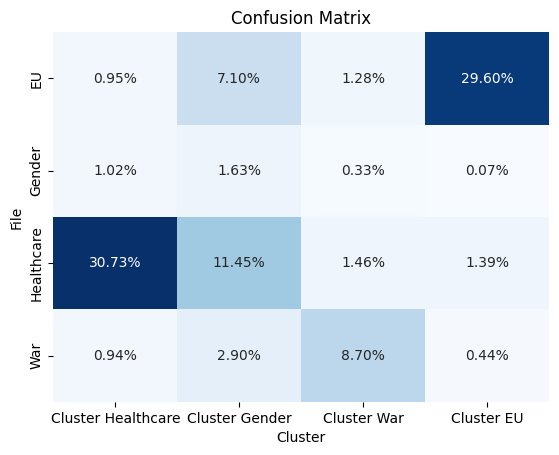

Cluster 1: Cluster ID 1
Cluster 2: Cluster ID 2
Cluster 3: Cluster ID 3
Cluster 4: Cluster ID 4


In [34]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Load the clustered speeches data
df = pd.read_feather(f'just_subcorpora_embeddings.pk1_{ncentroids}.feather')
# Load the CSV files with speeches

csv_file1 = pd.read_csv('eu_GB.csv')
csv_file2 = pd.read_csv('gender_GB.csv')
csv_file3 = pd.read_csv('healthcare_GB.csv')
csv_file4 = pd.read_csv('war_GB.csv')

# Create a mapping dictionary between speech ID and cluster ID
mapping_dict = dict(zip(df['speech_id'], df['cluster_id']))

# Extract the speech IDs from the CSV files
speech_ids1 = csv_file1['ID']
speech_ids2 = csv_file2['ID']
speech_ids3 = csv_file3['ID']
speech_ids4 = csv_file4['ID']


# Map the speech IDs to cluster IDs
# Extract the speech IDs and cluster IDs
speech_ids = df['speech_id']
cluster_ids = df['cluster_id']

# Create a dictionary to map speech IDs to cluster IDs
mapping_dict = dict(zip(speech_ids, cluster_ids))

# Compute the confusion matrix
num_clusters = len(np.unique(cluster_ids))

confusion_matrix = np.zeros((num_clusters, num_clusters))

# Helper function to update the confusion matrix
def update_confusion_matrix(file, file_index):
    for speech_id in file['ID']:
        cluster_id = mapping_dict.get(speech_id, -1)
        if cluster_id != -1:
            confusion_matrix[file_index, cluster_id] += 1

# Update the confusion matrix for each CSV file
update_confusion_matrix(csv_file1, 0)
update_confusion_matrix(csv_file2, 1)
update_confusion_matrix(csv_file3, 2)
update_confusion_matrix(csv_file4, 3)

# Normalize the confusion matrix by row-wise sums
row_sums = confusion_matrix.sum(axis=1, keepdims=True)
total_sum = confusion_matrix.sum()

confusion_matrix_normalized = confusion_matrix / total_sum #row_sums

# Print the confusion matrix
print(confusion_matrix_normalized)

# Create a DataFrame for the confusion matrix
df_confusion = pd.DataFrame(confusion_matrix_normalized, index=['EU', 'Gender', 'Healthcare', 'War'], columns=['Cluster Healthcare', 'Cluster Gender', 'Cluster War', 'Cluster EU'])

# Plot the heatmap
sns.heatmap(df_confusion, annot=True, cmap='Blues', fmt='.2%', cbar=False)
plt.xlabel('Cluster')
plt.ylabel('File')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix_heatmap.png')
plt.show()

cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Print the correspondence between column labels and cluster IDs
for idx, label in enumerate(cluster_labels):
    print(f"{label}: Cluster ID {idx+1}")

In [ ]:
csv_file1 = pd.read_csv('eu_GB.csv')
csv_file2 = pd.read_csv('gender_GB.csv')
csv_file3 = pd.read_csv('healthcare_GB.csv')
csv_file4 = pd.read_csv('war_GB.csv')